# INTRODUCTION

Breast cancer is a common type of cancer that causes breast cells to form tumours. This type of cancer is more prevalent in women, with about 0.5-1% occuring in men, according to WHO (2023). To help the early detection and treatment of this cancer, the use of unsupervised machine learning techniques and algorithms has generated great interest in the health sector (Doi $et$ $al$, 1999). 

In this study, KMeans clustering, hierarchical clustering and DBSCAN are employed to assist in comparing the grouping of the nuclei of cells to provide insights and determine the status of the nuclei of cells, whether malignant or benign.

Further, five(5) supervised machine learning algorithms were used to classify a cell as either malignant or benign. The algorithms used were Logistic regression, LinearSVC, SVC, Random forest classifier and Decision tree classifier.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

##### $Exploratory$ $data$ $analysis$  $and$ $data$ $pre-processing$

In [2]:
#Loading data & displaying top 5 rows of dataset
cancer = pd.read_csv('MS4S16_Dataset.csv')
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302.0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517.0,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903.0,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301.0,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402.0,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
#showing columns with number of non-null cells per column
cancer.info()

#There are 571 rows and 32 columns, with diagnosis and id being the categorical variables.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       568 non-null    float64
 1   diagnosis                568 non-null    object 
 2   radius_mean              566 non-null    float64
 3   texture_mean             565 non-null    float64
 4   perimeter_mean           567 non-null    float64
 5   area_mean                566 non-null    float64
 6   smoothness_mean          568 non-null    float64
 7   compactness_mean         567 non-null    float64
 8   concavity_mean           567 non-null    float64
 9   concave points_mean      563 non-null    float64
 10  symmetry_mean            568 non-null    float64
 11  fractal_dimension_mean   567 non-null    float64
 12  radius_se                565 non-null    float64
 13  texture_se               563 non-null    float64
 14  perimeter_se             5

In [4]:
#Summary statistics of the data
cancer.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,568.0,3.011402e+07,1.250894e+08,8.670000e+03,869077.750000,906001.000000,8.812852e+06,9.113205e+08
radius_mean,566.0,1.410327e+01,3.517424e+00,6.981000e+00,11.692500,13.320000,1.578000e+01,2.811000e+01
texture_mean,565.0,-2.419737e+02,4.452169e+02,-9.990000e+02,-999.000000,17.000000,2.101000e+01,3.928000e+01
perimeter_mean,567.0,9.194905e+01,2.435803e+01,4.379000e+01,75.190000,86.240000,1.042000e+02,1.885000e+02
area_mean,566.0,6.549424e+02,3.525559e+02,1.435000e+02,420.300000,548.750000,7.870500e+02,2.501000e+03
smoothness_mean,568.0,9.631188e-02,1.417781e-02,5.263000e-02,0.086290,0.095895,1.053250e-01,1.634000e-01
compactness_mean,567.0,1.043333e-01,5.287836e-02,1.938000e-02,0.064710,0.092630,1.304000e-01,3.454000e-01
concavity_mean,567.0,8.871189e-02,7.973907e-02,0.000000e+00,0.029520,0.061540,1.300000e-01,4.268000e-01
concave points_mean,563.0,-3.500369e+00,5.949231e+01,-9.990000e+02,0.019885,0.033340,7.352000e-02,2.012000e-01
symmetry_mean,568.0,1.874016e-01,1.150079e-01,7.000000e-04,0.161900,0.179200,1.957000e-01,2.100000e+00


The count of the dataset is not evenly distributed, indicating the existence of missing values.
There also exist possible invalid values in certain columns; eg. the value -999 at 25% of texture_mean. Convavity variables have a miniumum value of 0.

Plotting some features will produce a better distribution of the data.

In [5]:
#checking for missing values and invalid values
sum_of_na = np.sum(cancer.isna().sum())
print(f"There are {sum_of_na} na values")
cancer.isna().sum()

#All columns have some missing values with a total of 203 missing values.

There are 203 na values


id                          3
diagnosis                   3
radius_mean                 5
texture_mean                6
perimeter_mean              4
area_mean                   5
smoothness_mean             3
compactness_mean            4
concavity_mean              4
concave points_mean         8
symmetry_mean               3
fractal_dimension_mean      4
radius_se                   6
texture_se                  8
perimeter_se                3
area_se                     6
smoothness_se               6
compactness_se              7
concavity_se                8
concave points_se           9
symmetry_se                 8
fractal_dimension_se        7
radius_worst               13
texture_worst              21
perimeter_worst             6
area_worst                  4
smoothness_worst            9
compactness_worst           4
concavity_worst             3
concave points_worst        6
symmetry_worst              4
fractal_dimension_worst    13
dtype: int64

In [6]:
#All invalid values are replaced by nan for easy removal or filling with values.

cancer.replace([' ','?',-999,'-','None','*',"","NA"],np.nan,inplace=True)

In [7]:
#updated nans after replacing invalid values.


sum_of_na = np.sum(cancer.isna().sum())
print(f"There are now {sum_of_na} missing values")
cancer.isna().sum()

#Texture mean has the highest number of missing values.

There are now 358 missing values


id                           3
diagnosis                    3
radius_mean                  5
texture_mean               151
perimeter_mean               4
area_mean                    5
smoothness_mean              3
compactness_mean             4
concavity_mean               4
concave points_mean         10
symmetry_mean                3
fractal_dimension_mean      12
radius_se                    6
texture_se                   8
perimeter_se                 3
area_se                      6
smoothness_se                6
compactness_se               7
concavity_se                 8
concave points_se            9
symmetry_se                  8
fractal_dimension_se         7
radius_worst                13
texture_worst               21
perimeter_worst              6
area_worst                   4
smoothness_worst             9
compactness_worst            4
concavity_worst              3
concave points_worst         6
symmetry_worst               4
fractal_dimension_worst     13
dtype: i

In [8]:
#Removing duplicates to refine the dataset.

cancer.drop_duplicates(inplace=True)
print(f"number of na's left: ",np.sum(cancer.isna().sum()))

number of na's left:  293


In [9]:
#Removing rows  that possess all NA values

cancer.dropna(how='all',inplace=True)
print(f"number of na's left: ",np.sum(cancer.isna().sum()))

number of na's left:  261


In [10]:
#Dropping id column because it is not relevant to this analysis

cancer.drop('id',axis=1,inplace=True)

In [11]:
cancer.isna().sum()

#Diagnosis and other variables have no missing values.
#The distribution of this data will be looked at to determine patterns in the dataset.

diagnosis                    0
radius_mean                  2
texture_mean               147
perimeter_mean               1
area_mean                    2
smoothness_mean              0
compactness_mean             1
concavity_mean               1
concave points_mean          7
symmetry_mean                0
fractal_dimension_mean       9
radius_se                    3
texture_se                   5
perimeter_se                 0
area_se                      3
smoothness_se                3
compactness_se               4
concavity_se                 5
concave points_se            6
symmetry_se                  5
fractal_dimension_se         4
radius_worst                10
texture_worst               18
perimeter_worst              3
area_worst                   1
smoothness_worst             6
compactness_worst            1
concavity_worst              0
concave points_worst         3
symmetry_worst               1
fractal_dimension_worst     10
dtype: int64

##### $Distribution$  $of$ $data$

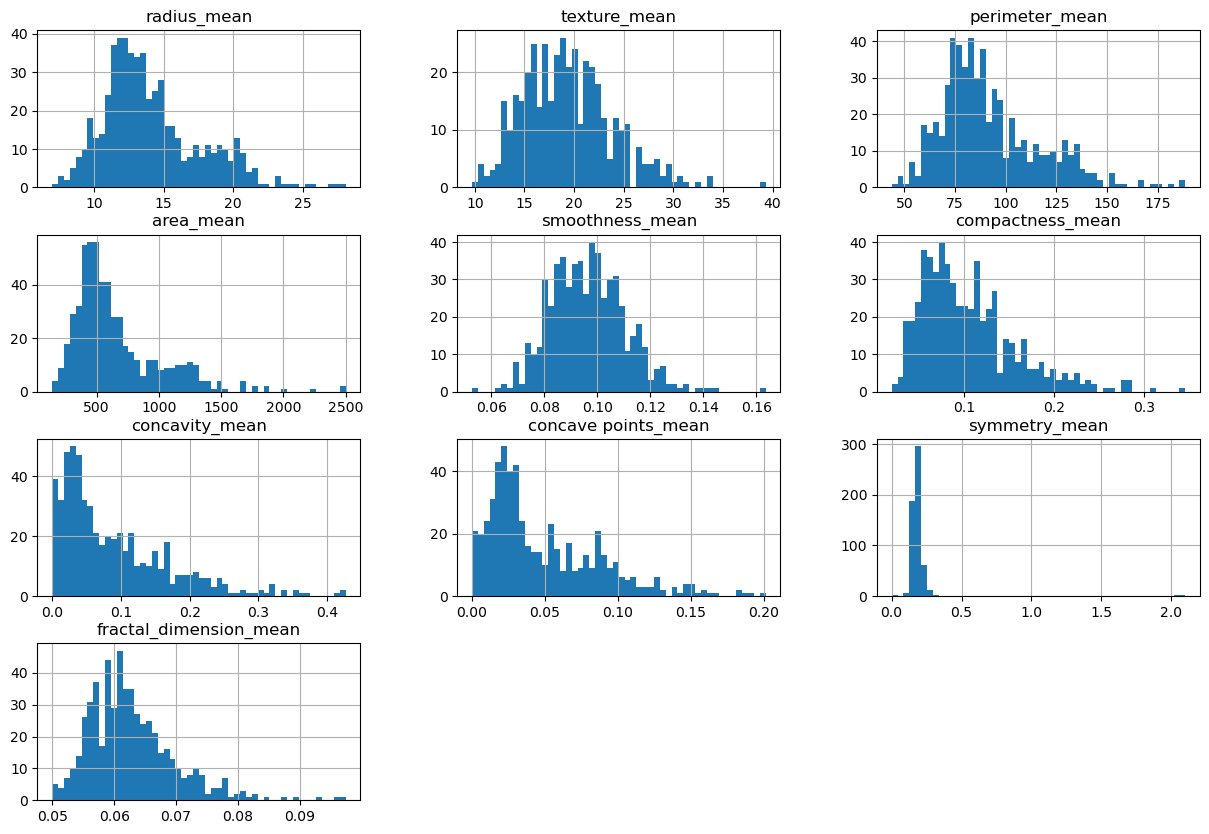

In [12]:
#Producing a histogram of ten(10) variables to better understand the dataset

hist_of_means = cancer.iloc[:,1:11]
#plt.figure(figsize=(60,60))
hist_of_means.hist(bins=50,figsize=(15,10))
plt.show()

Figure 1. Histograms of variables

Fig. 1 reveals the different scales (x-axis values) of features, with area_mean recording large values and 
fractal_dimension_mean with the lowest values. The plot also confirms that most of the features are right skewed.
Feature scaling is needed on the dataset.


##### $Correlation$ $and$ $pairplots$

Correlation analysis is performed to deal with multicollinearity of features for a better model.
Spearman's correlation is used because from the above histogram plots, not all the features are normally distributed


In [13]:
corr = cancer.corr(numeric_only=True,method='spearman').round(4)
corr

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.0000,0.3510,0.9978,0.9996,0.1437,0.4933,0.6431,0.7579,0.1178,-0.3594,...,0.9787,0.2975,0.9545,0.9722,0.1228,0.4893,0.5938,0.7249,0.1741,0.0396
texture_mean,0.3510,1.0000,0.3689,0.3656,0.0169,0.2798,0.3396,0.3031,0.1064,-0.0600,...,0.3758,0.9167,0.3972,0.3688,0.1082,0.2925,0.3396,0.3253,0.1515,0.1122
perimeter_mean,0.9978,0.3689,1.0000,0.9971,0.1797,0.5408,0.6804,0.7870,0.1492,-0.3154,...,0.9811,0.3139,0.9685,0.9738,0.1543,0.5328,0.6305,0.7558,0.1985,0.0839
area_mean,0.9996,0.3656,0.9971,1.0000,0.1342,0.4875,0.6421,0.7538,0.1170,-0.3650,...,0.9794,0.3087,0.9547,0.9734,0.1194,0.4866,0.5943,0.7240,0.1734,0.0356
smoothness_mean,0.1437,0.0169,0.1797,0.1342,1.0000,0.6785,0.5186,0.5620,0.5430,0.5808,...,0.1995,0.0725,0.2158,0.1927,0.7926,0.4801,0.4279,0.4949,0.3949,0.5150
compactness_mean,0.4933,0.2798,0.5408,0.4875,0.6785,1.0000,0.8967,0.8471,0.5550,0.4906,...,0.5404,0.2553,0.5752,0.5267,0.5761,0.9010,0.8381,0.8245,0.4558,0.6921
concavity_mean,0.6431,0.3396,0.6804,0.6421,0.5186,0.8967,1.0000,0.9275,0.4493,0.2515,...,0.6799,0.3308,0.7049,0.6714,0.4901,0.8500,0.9390,0.9072,0.3856,0.5443
concave points_mean,0.7579,0.3031,0.7870,0.7538,0.5620,0.8471,0.9275,1.0000,0.4225,0.1263,...,0.7850,0.2920,0.7915,0.7760,0.4870,0.7562,0.8265,0.9372,0.3516,0.4157
symmetry_mean,0.1178,0.1064,0.1492,0.1170,0.5430,0.5550,0.4493,0.4225,1.0000,0.4230,...,0.1648,0.1272,0.1806,0.1556,0.4283,0.4431,0.3971,0.4002,0.7089,0.4178
fractal_dimension_mean,-0.3594,-0.0600,-0.3154,-0.3650,0.5808,0.4906,0.2515,0.1263,0.4230,1.0000,...,-0.3016,-0.0446,-0.2622,-0.3096,0.4832,0.3934,0.2375,0.1312,0.2938,0.7584


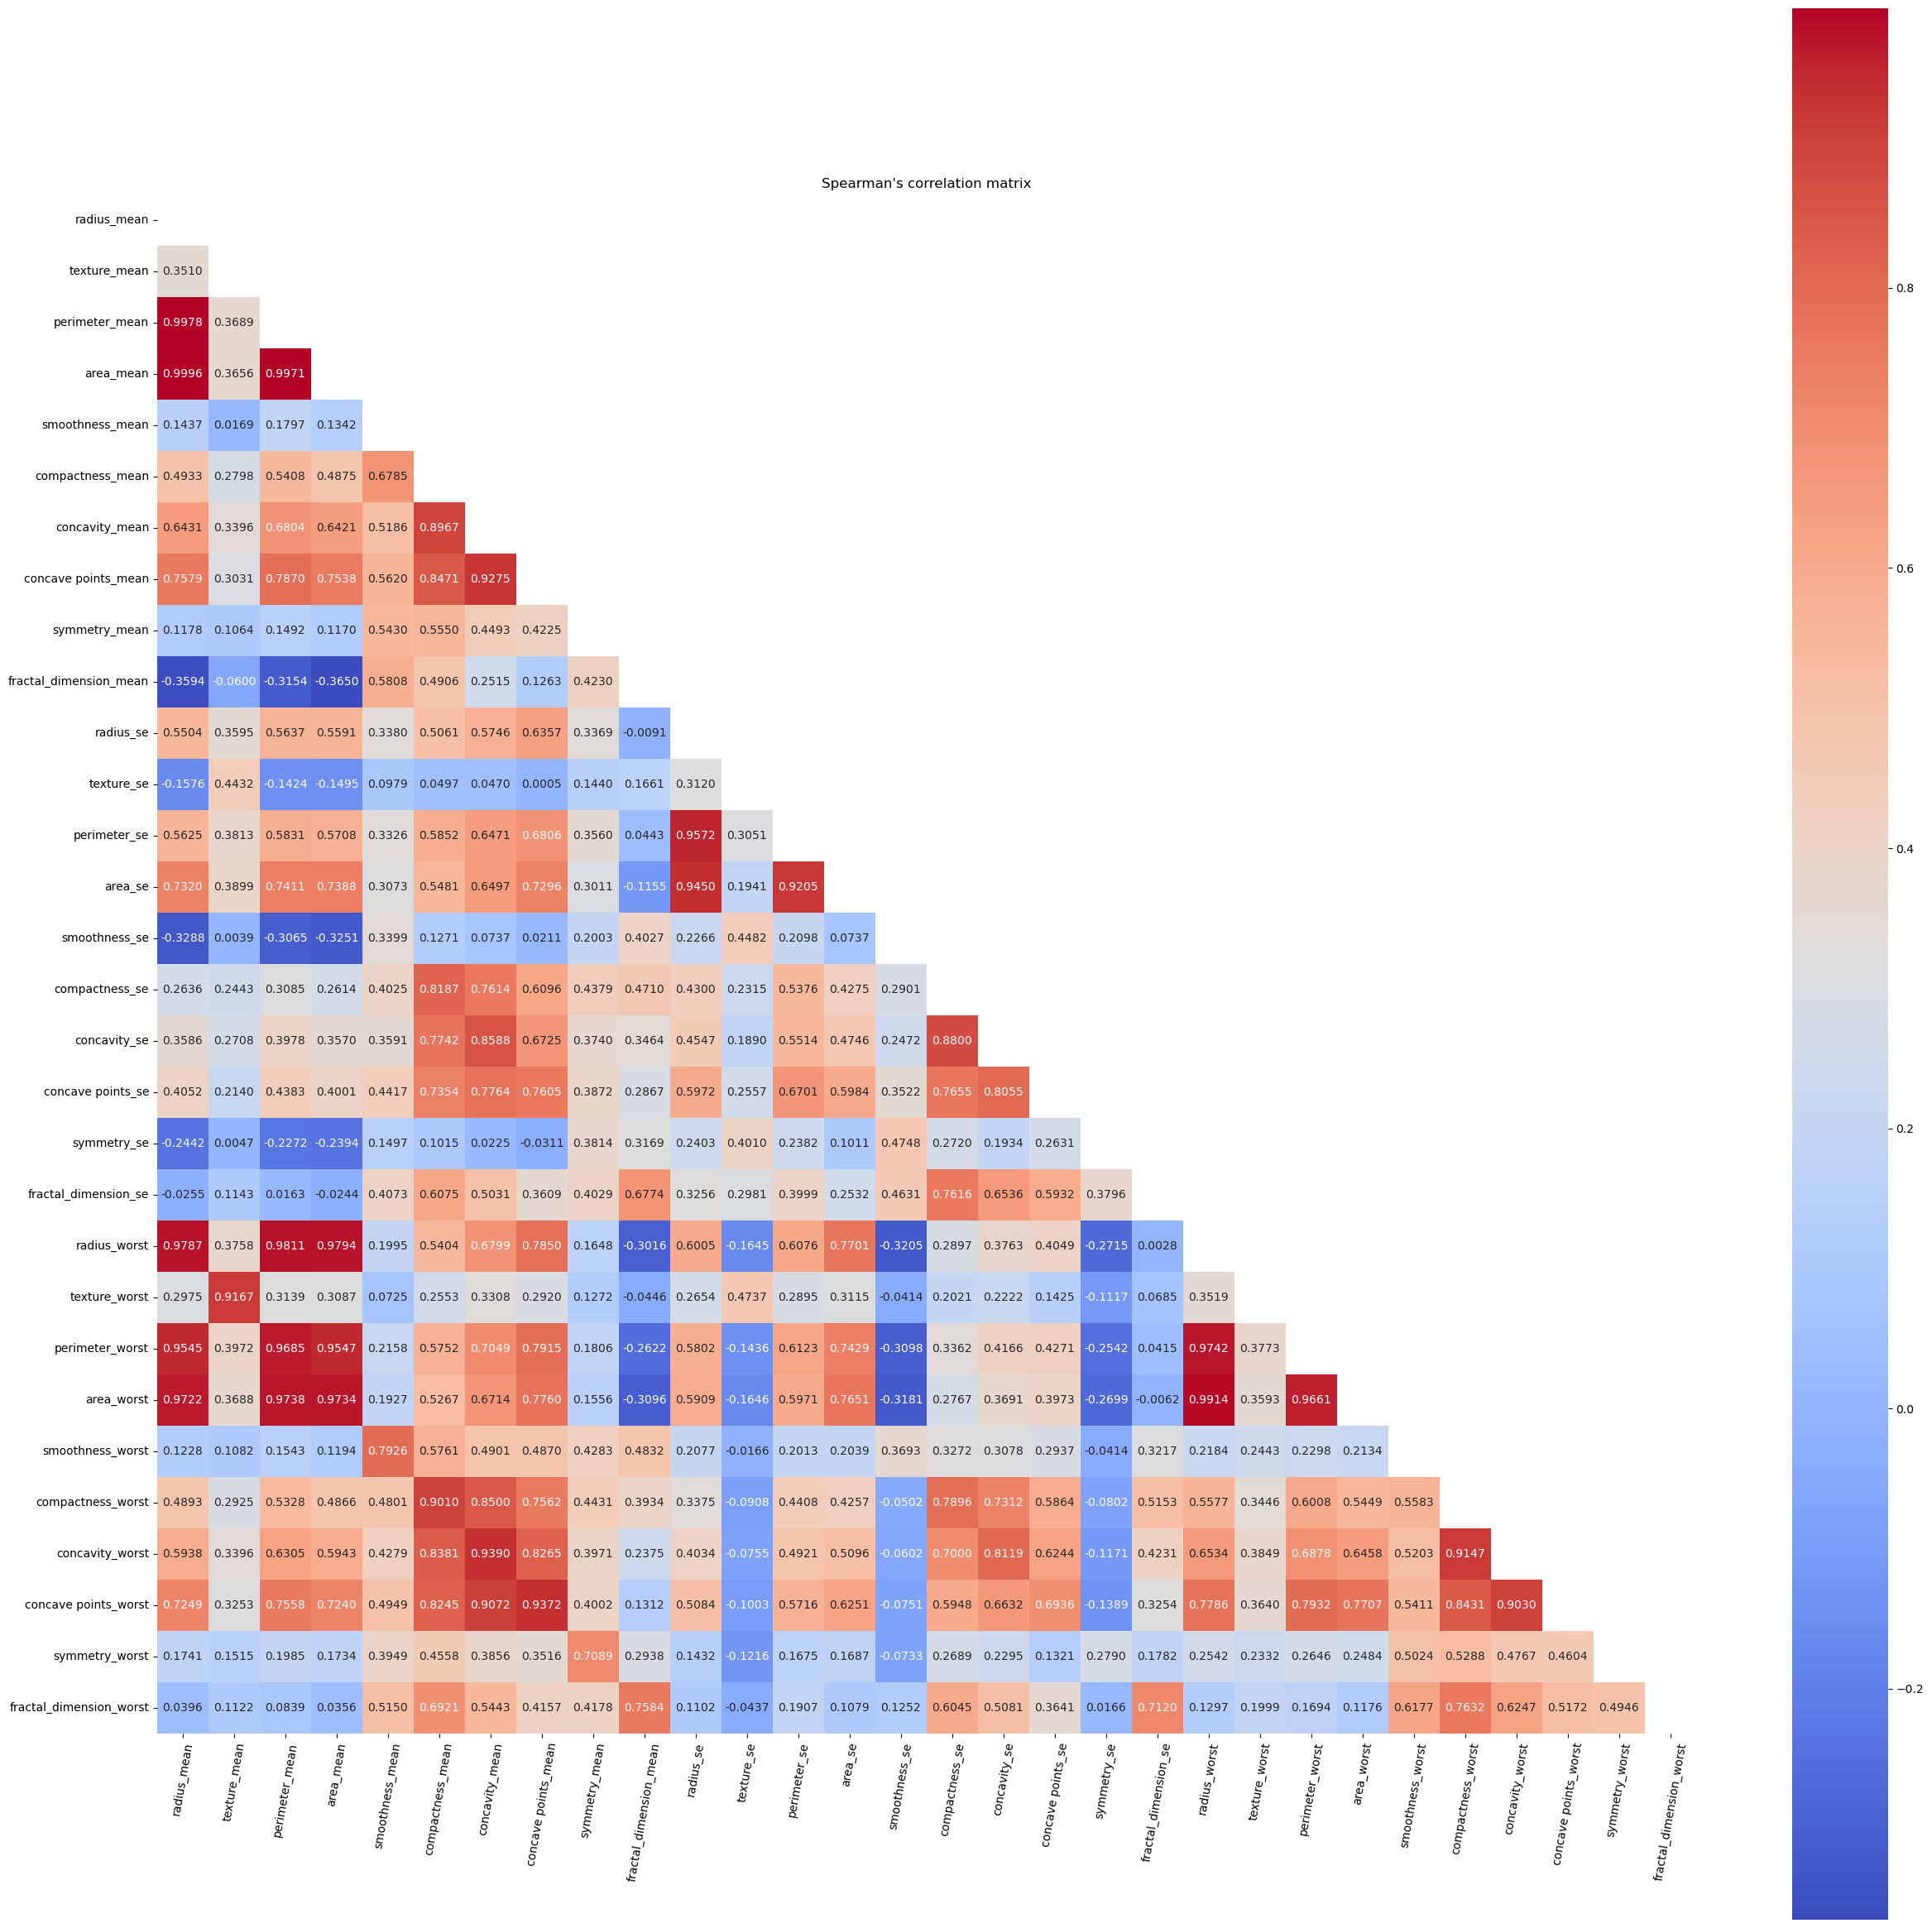

In [14]:
#Only numeric columns are used for the correlation matrix

corr_list = list(cancer.iloc[:,1:].columns) #producing the list of column names for plotting a heatmap.
corr_data = corr.loc[corr_list,corr_list]

#Creating a heatmap showing correlation matrix

plt.figure(figsize=(30,30))
mask = np.triu(np.ones_like(corr_data))
g = sns.heatmap(data=corr_data,annot=True,mask=mask,square=True,fmt='.4f',cmap='coolwarm')
g.set_title("Spearman's correlation matrix")
plt.xticks(rotation=80)
plt.show()

Figure 2 Correlation matrix of all features of cancer dataset

In [15]:
#finding the average of highly correlated columns to aid in resolving multicollinearity.
#Eg. perimeter_mean vs area_mean

print(corr.loc['perimeter_mean',:].mean())
print(corr.loc['area_mean',:].mean())

#By the results below, perimeter mean is removed from the analysis. 
#This is repeated for the other highly correlated variables. 

0.4450433333333333
0.4210066666666667


In [16]:
#Using a loop to remove highly correlated features
#The threshold used for determining highly correlated features was the correlation coefficient with an absolute
#value greater than 0.6.

removed = ['area_mean','perimeter_mean','radius_worst','area_worst','perimeter_worst',
          'perimeter_se','area_se','concavity_mean','concavity_worst','concave points_mean','texture_mean',
          'compactness_mean','concavity_se','concave points_worst','smoothness_mean','fractal_dimension_worst',
          'compactness_worst','compactness_se','symmetry_mean','fractal_dimension_se']

all_col = list(cancer.iloc[:,1:].columns)
new_col = []
for value in range(0,len(all_col)):
    if all_col[value] not in removed:
        new_col.append(all_col[value])

print(new_col)

#Remaining features used for the analysis are found below:

['radius_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se', 'concave points_se', 'symmetry_se', 'texture_worst', 'smoothness_worst', 'symmetry_worst']


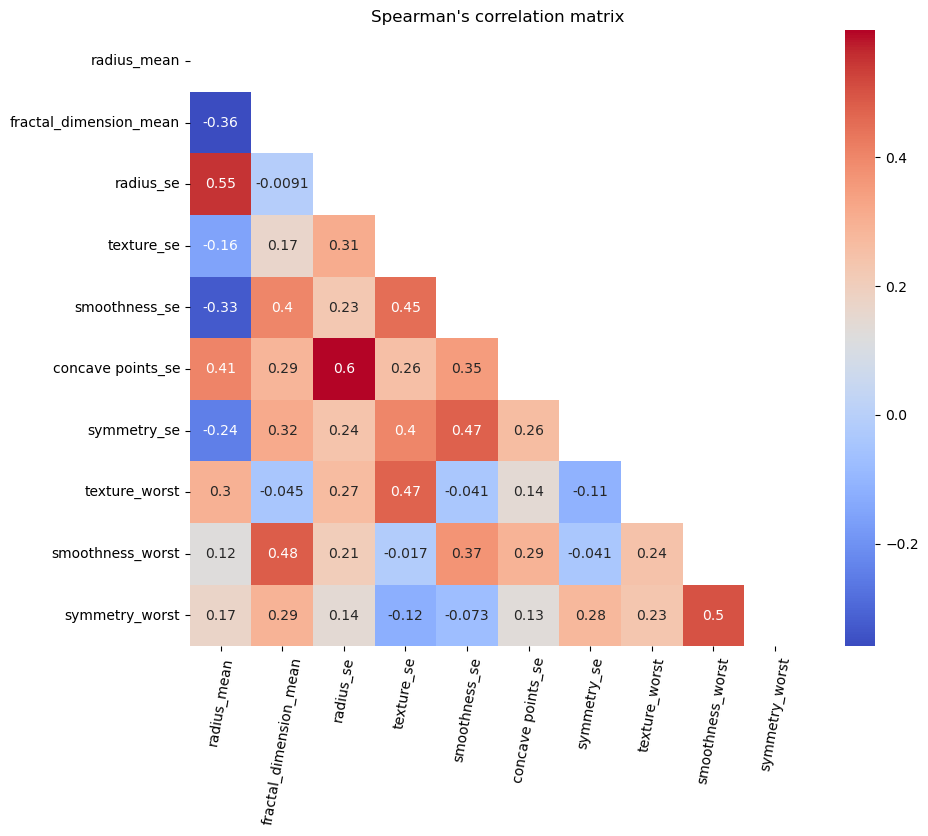

In [17]:
#Final correlation matrix 

corr_data = corr.loc[new_col,new_col]

#creating a heatmap showing correlation matrix

plt.figure(figsize=(10,8))
mask = np.triu(np.ones_like(corr_data))
g = sns.heatmap(data=corr_data,annot=True,mask=mask,square=True,cmap='coolwarm')
g.set_title("Spearman's correlation matrix")
plt.xticks(rotation=80)
plt.show()

Figure 3. Correlation matrix after removing highly correlated variables

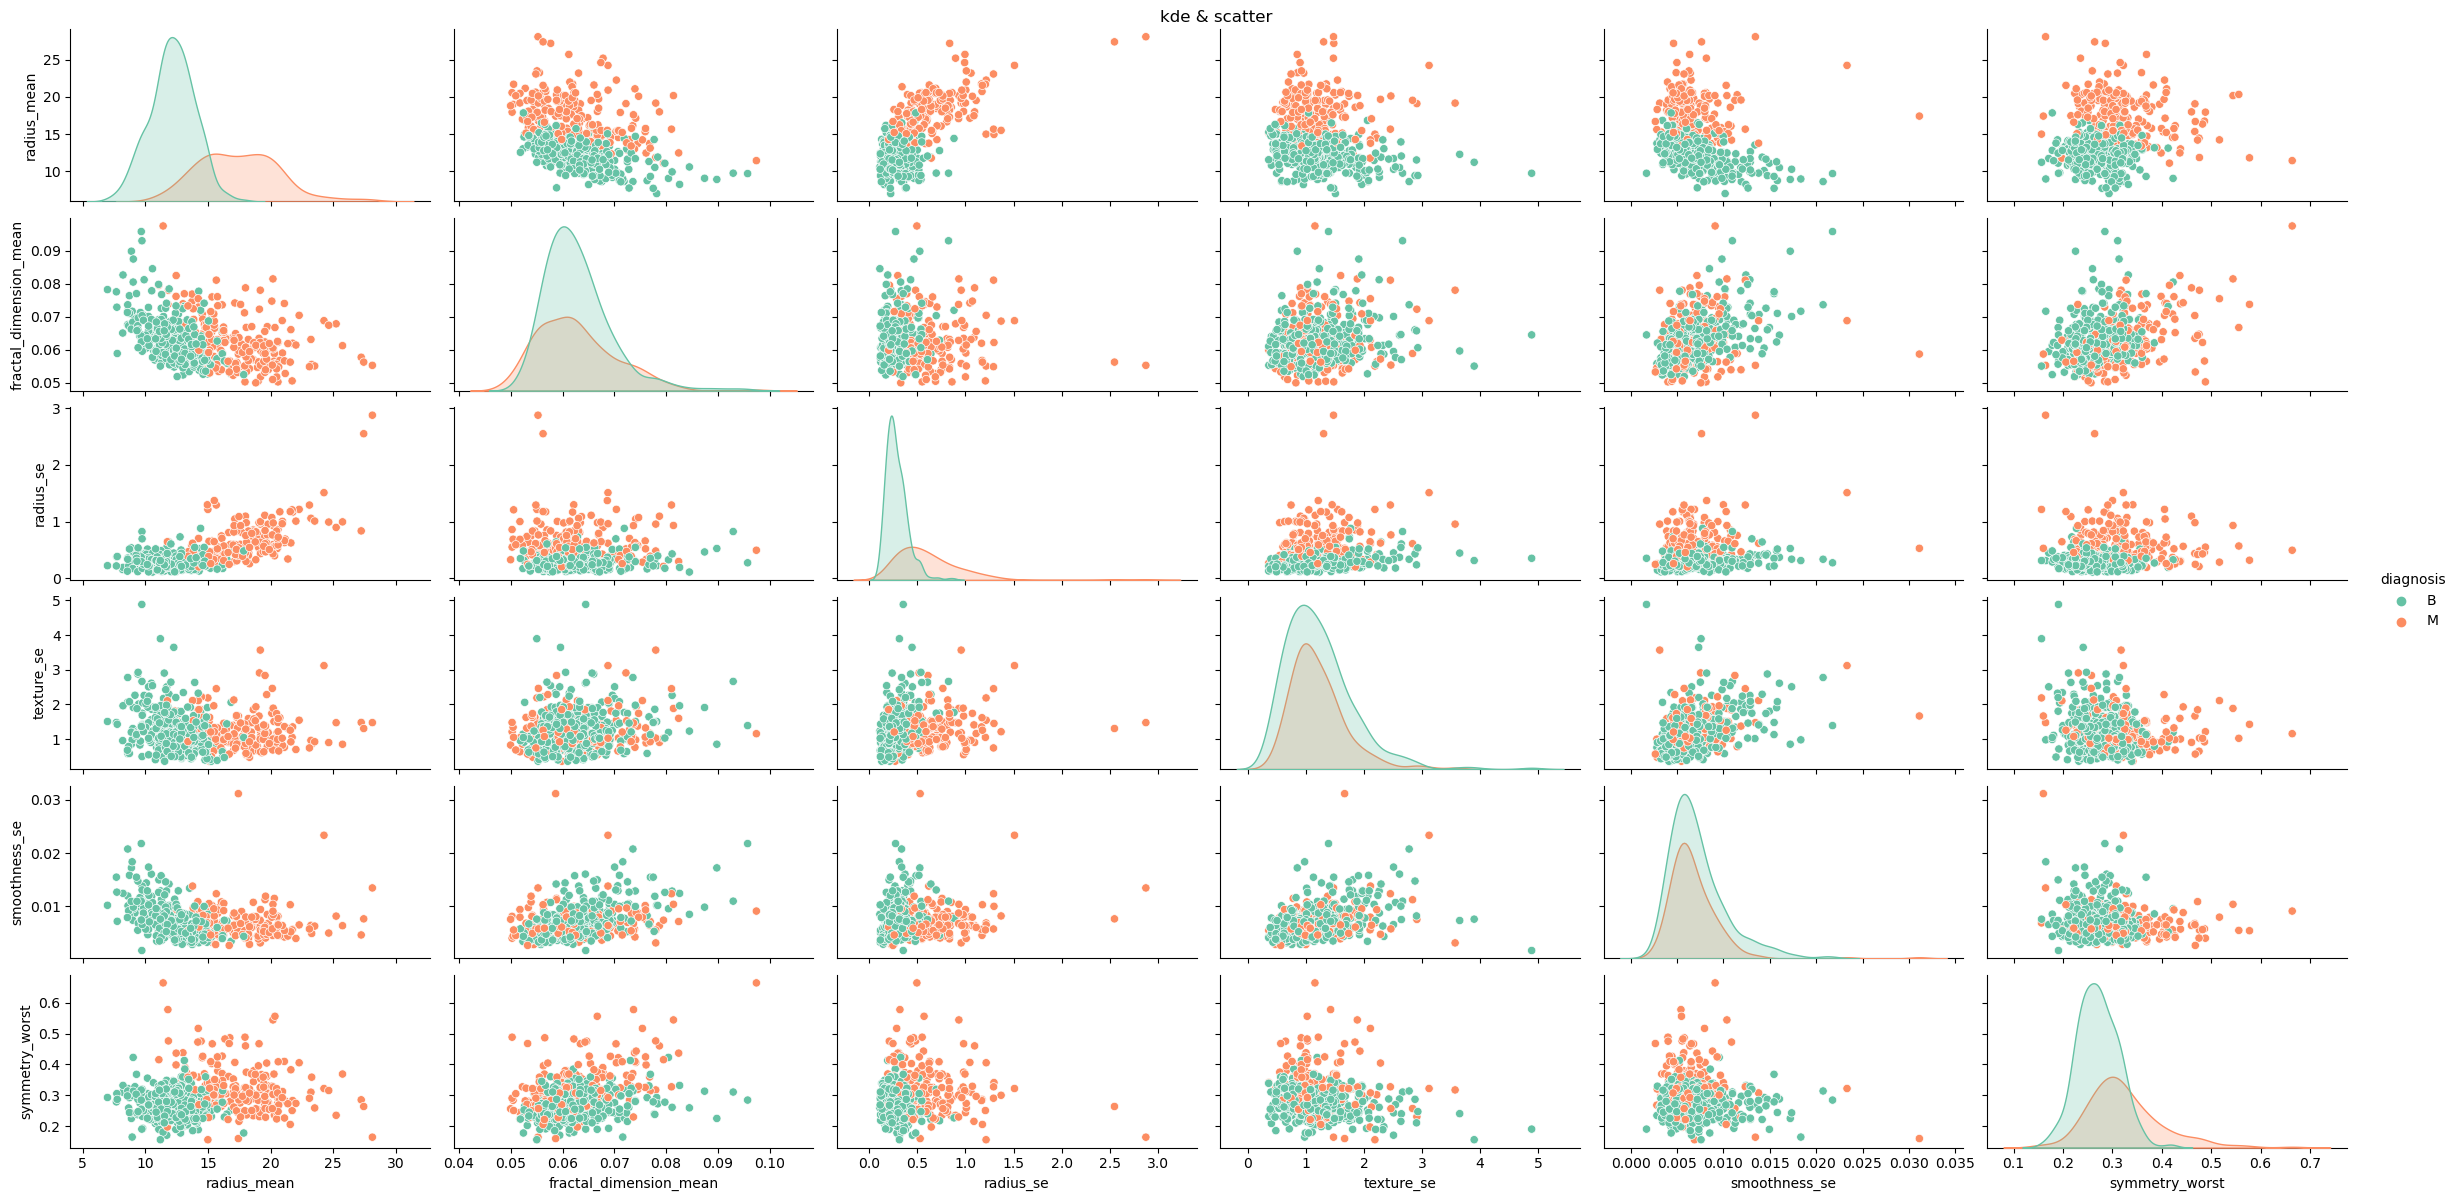

In [18]:
#Finding relationships and comparing distribution of variables using a pairplot 

pairplot = ['radius_mean', 'fractal_dimension_mean','radius_se', 
            'texture_se','smoothness_se','symmetry_worst']
p = sns.pairplot(data=cancer,x_vars=pairplot,
             y_vars=pairplot,
            diag_kind='kde',hue='diagnosis',palette='Set2',height=2,aspect=2,hue_order=['B','M'])
p.fig.suptitle('kde & scatter',y=1)
plt.show()

Figure 4. Pairplot showing relationship and distribution between variables, hued by the diagnosis type. Malignant cells tend to have larger values than benign cells

##### $Feature$ $selection$

In [19]:
#columns to select from the original cancer dataset after dealining with multicollineariity
cancer_cols = new_col.copy()
cancer_cols.append('diagnosis') 

In [20]:
#creating new dataset with the set of columns that are not highly correlated
cancer_refined = cancer[cancer_cols].copy()
cancer_refined.head() #top 5 values of the refined dataset

,radius_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,concave points_se,symmetry_se,texture_worst,smoothness_worst,symmetry_worst,diagnosis
0,17.99,0.07871,1.0950,0.9053,0.006399,0.01587,0.03003,17.33,0.1622,0.4601,M
1,20.57,0.05667,0.5435,0.7339,0.005225,0.01340,0.01389,23.41,0.1238,0.2750,M
2,19.69,0.05999,0.7456,0.7869,0.006150,0.02058,0.02250,25.53,0.1444,0.3613,M
3,11.42,0.09744,0.4956,1.1560,0.009110,0.01867,0.05963,26.50,0.2098,0.6638,M
4,20.29,0.05883,0.7572,0.7813,0.011490,0.01885,0.01756,16.67,0.1374,0.2364,M


In [21]:
#Proportion of benign and malignant cases
numCases = pd.DataFrame(cancer_refined.value_counts('diagnosis',ascending=False),columns=['num_of_cases'])
numCases['percent'] = round((numCases/np.sum(numCases))*100,2)
numCases

,num_of_cases,percent
diagnosis,,
B,355,62.72
M,211,37.28


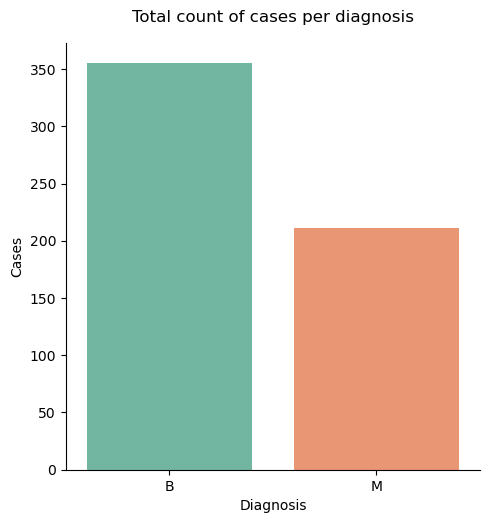

In [22]:
#Total count of cases per each diagnosis represented by a count plot
sns.catplot(data=cancer_refined,x='diagnosis',kind='count',estimator='percent',order=['B','M'],palette='Set2')
plt.xlabel('Diagnosis')
plt.ylabel('Cases')
plt.title('Total count of cases per diagnosis',y=1.03)
plt.show()

Figure 5. Count plot showing the count of each type of diagnosis ie malignant vs benign

In [23]:
#grouping of diagnosis and calculating median on any selected feature(s)
def groupings(dataset,list_of_columns):
    try:
        group_data = dataset.groupby('diagnosis')[list_of_columns].median()
        return group_data
    except:
        print('Please enter correct name of feature')

In [24]:
groupings(cancer_refined,['radius_mean', 'radius_se']) 
#malignant showing larger mean values  

,radius_mean,radius_se
diagnosis,,
B,12.2,0.2575
M,17.3,0.5472


In [25]:
#Replacing diagnosis column with 0 or 1 to identify Malignant and benign cases; 0 for benign and 1 for malignant

cancer_refined['diagnosis'].replace(['M','B'],[1,0],inplace=True)
cancer_refined.value_counts('diagnosis')

#Same count of values as represented by M and B

diagnosis
0    355
1    211
dtype: int64

##### $Filling$ $missing$ $values$ $with$ $SimpleImputer$

The remaining missing values from the dataset will be replaced by the median of each missing value's corresponding column.
This ensures that values are not affected by extreme values present in each column.

In [26]:
#NA remaining after feature selection
np.sum(cancer_refined.isna().sum())

58

In [27]:
#filling missing values with median values using Imputer

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median') 

#This will aid in calculating the median of each column and fill missing values of each column with it's median

In [28]:
cancer_refined2 = imputer.fit_transform(cancer_refined) #New dataset with calculated medians filling the NA's
cancer_final = pd.DataFrame(cancer_refined2, columns = cancer_refined.columns) #New dataframe with all NA's filled

In [29]:
#confirmation of filling all na values 
print(f"Number of na's:",np.sum(cancer_final.isna().sum()))
cancer_final.isna().sum()

Number of na's: 0


radius_mean               0
fractal_dimension_mean    0
radius_se                 0
texture_se                0
smoothness_se             0
concave points_se         0
symmetry_se               0
texture_worst             0
smoothness_worst          0
symmetry_worst            0
diagnosis                 0
dtype: int64

In [30]:
#Selecting data and labels for training and testing
cancer_final.diagnosis = cancer_final.diagnosis.astype('int') #changing the diagnosis from float to int
X = cancer_final.drop('diagnosis',axis=1) #Selecting all features except the diagnosis
y = cancer_final['diagnosis'] #Selecting the label data

##### $Outlier$ $observations$

A quick review of the outliers present in the dataset is performed to check if it is possible to remove outliers. 

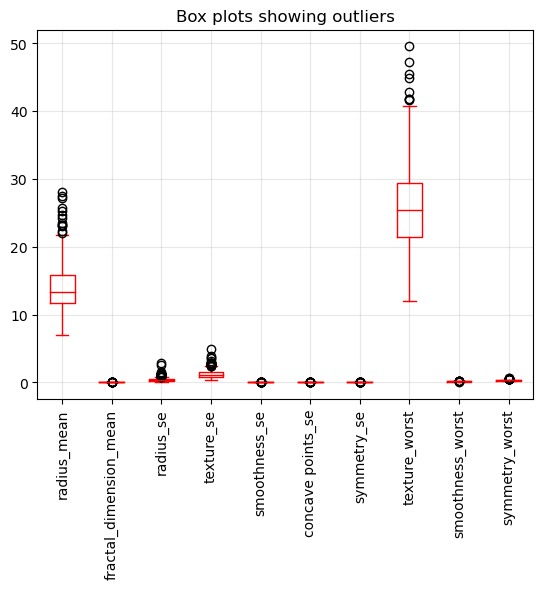

In [31]:
#creating a copy of the features data (X) to locate possible outliers
cancer_outliers = X.copy()

#box plot to detect outliers
cancer_outliers.boxplot(color='#FF0000')
plt.xticks(rotation = 90)
plt.title('Box plots showing outliers')
plt.grid(alpha=0.3)
plt.show()

Figure 6. Box-plot showing outiers of features 

In [32]:
#to help remove outliers, a function is created to calculate the lower_limit, upper_limit and Interquartile_range
def limits(column_name,table):
    Q1 = table[column_name].quantile(0.25) 
    Q3 = table[column_name].quantile(0.75)
    IQR = Q3-Q1                  #Interquartile range
    lower_lim = Q1 - (1.5 * IQR) #calculating the lower_limit
    upper_lim = Q3 + (1.5 * IQR) #calculating the upper_limit
    return lower_lim,upper_lim

In [40]:
#For each loop, the lower and upper limit will be calculated for a column (except diagnosis column),
#and the subset of the data will be stored in place of the original dataset
for col_name in list(cancer_outliers.columns):
    lower_limit, upper_limit = limits(col_name,cancer_outliers) #lower and upper limit values per the column name
    cancer_outliers = cancer_outliers[(cancer_outliers[col_name] > lower_limit) & 
                (cancer_outliers[col_name] < upper_limit)]
cancer_outliers.shape

#the number of rows and columns left after removing ALL outliers

(295, 10)

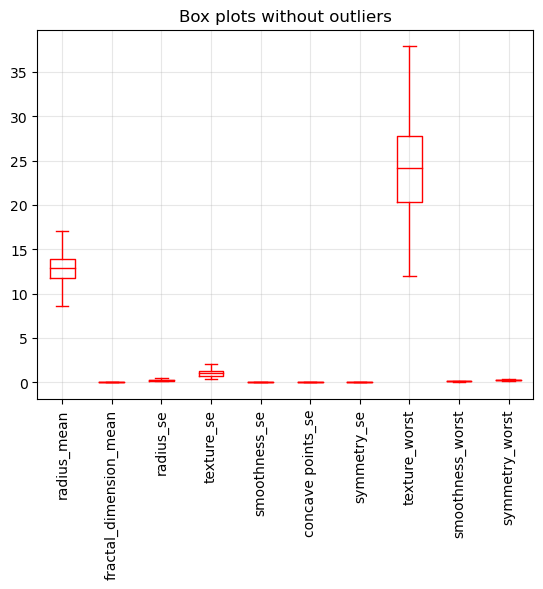

In [42]:
#box plot to detect data with no outliers
cancer_outliers.boxplot(color='#FF0000')
plt.xticks(rotation = 90)
plt.title('Box plots without outliers')
plt.grid(alpha=0.3)
plt.show()

Figure 7. Box-plot showing features with no outliers

Removing 'outliers' will result in reducing the data from 566 to 295 observations which indicates that more than a half
of the data is lost. This could be critical to our analysis as I wish to analyse cancer cells of different sizes.
Outliers were not removed from the dataset.

The next step is to scale the data for further analysis.

##### $Feature$ $scaling$ $for$ $cluster$ $analysis$

In [43]:
from sklearn.preprocessing import StandardScaler
scaler_cluster = StandardScaler()
cancer_scaled = scaler_cluster.fit_transform(X) #cancer_scaled will be used for the cluster analysis

In [44]:
cancer_scaled

array([[ 1.10985104,  2.31701338,  2.48886064, ..., -1.39142097,
         1.30719176,  2.74424311],
       [ 1.84685777, -0.88112816,  0.50019994, ..., -0.3828186 ,
        -0.38491285, -0.24651037],
       [ 1.59547563, -0.39937544,  1.22895484, ..., -0.03113488,
         0.52283077,  1.14788199],
       ...,
       [ 0.71278152, -0.90869835,  0.18612497, ...,  1.39384775,
        -0.82115856, -1.10608944],
       [ 1.85542762, -0.17300971,  1.15827896, ...,  2.27305705,
         1.43057438,  1.91374755],
       [-1.81246635, -0.56624762, -0.06881304, ...,  0.77176569,
        -1.87608003, -0.05100461]])

##### $Train$, $test$ $split$ $for$ $classification$

In [45]:
#Changing the dimension of the data
X_cancer = np.array(X).reshape(len(X),len(X.columns))
y_cancer = np.array(y).reshape(len(y),)

In [46]:
from sklearn.model_selection import train_test_split

#creating a train,test data set for regression/classification analysis with a test size of 20%
X_train, X_test, y_train, y_test = train_test_split(X_cancer,y_cancer,test_size=0.2,random_state=0)

In [47]:
#feature scaling for classification
scaler_classification = StandardScaler() #Creating an instance of StandardScaler
X_train_scaled = scaler_classification.fit_transform(X_train) #Fitting and transforming the train set
X_test_scaled = scaler_classification.transform(X_test)       #Transforming the test set after fitting the train set

### $Summary$ $of$ $section$

The dataset consisting of the attributes related to the nuclei of cells from breast cancer tumours was composed of 
571 observations from 32 features/variables. An initial exploratory analysis revealed that the dataset included missing values and duplicated entries as well as features being on different scales, confirmed from a histogram of features. After removing duplicates and handling invalid values, the observations were reduced to 566. 

A scatter pairplot with kernel density (representing data distribution) was created to observe the relationship 
between features. The data points were grouped by the diagnosis feature and this revealed malignant observations 
tending to have larger values than benign data points. Also, some data points moved away from the group(M or B), these were possible outliers.

Further analysis performed using correlation analysis revealed a case of multicollinearity among most features. A total of 20 features were excluded from the analysis due to high correlations with other features as this would make the model inefficient and perform quite poorly. The features selected to work with were; radius_mean,fractal_dimension_mean,radius_se, texture_se , smoothness_se, concave points_se, symmetry_se, texture_worst, smoothness_worst, symmetry_worst.

The remaining missing values were replaced by the median of each corresponding feature. The median was the appropriate central tendency measure to use in order to avoid further skewness caused by extreme values in the dataset. Removing outliers would have resulted in losing more than 50% of the data points, hence outliers were not exempted from the study. Also, outliers could provide useful information about each diagnosis type.

In addressing the scale of the data, Standard Scaler was adopted to ensure that features are on a similar scale with a mean of zero (0) and standard deviation of one (1) which would ensure that the model is not affected by outliers.  

62.72% of the cases were grouped as benign cases, with the rest being malignant cases.  


# CLUSTERING ANALYSIS

In order to better understand the dataset and draw meaningful insights from the attributes of the nuclei of cells with no labels/target, clustering analysis is performed. This comprises of unsupervised algorithms adopted to group datapoints for further analysis. Algorithms used in this section are the KMeans clustering, Agglomerative clustering, the DBSCAN algorithm and the visual representation of clusters using the dendrogram.

Metrics such as silhouette scores and inertia are used to aid in determining the number of clusters to choose for KMeans clustering. The cluster corresponding to the highest silhouette score is chosen as the appropriate cluster while with inertia, a line plot indicating an 'elbow' in the shape of the plot signifies the best cluster.

##### $Kmeans$ $cluster$ $analysis$

In [48]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [49]:
#Using Inertia and Silhouette scores to determine the appropriate number of clusters
#getting Inertia scores for clusters k, from 2 to 7
inertia = []
for k in range(2,7):
    kmeans_k = KMeans(n_clusters=k,n_init='auto',random_state=0)
    kmeans_k.fit(cancer_scaled)
    inertia.append(kmeans_k.inertia_)
print(f'Inertia scores: {inertia}')

Inertia scores: [4662.8558278103, 4038.64198232156, 3694.9274634607327, 3487.4276410658777, 3308.2630762779354]


In [50]:
silhouette = []
for s in range(2,7):
    kmeans_s = KMeans(n_clusters=s,n_init='auto',random_state=0)
    kmeans_s.fit(cancer_scaled)
    silhouette.append(silhouette_score(cancer_scaled,kmeans_s.labels_,metric='euclidean'))
print(f"Silhouette scores: {silhouette}")

Silhouette scores: [0.23170108710928983, 0.20792664987828027, 0.19463634275419353, 0.17432525177556316, 0.1200887213860071]


In [51]:
#visualising the scores
def Selectcluster_Plot(x,y):
    sns.relplot(x=x,y=y,kind='line',color='green')
    sns.scatterplot(x=x,y=y,color='r')
    plt.xticks([2.0,3.0,4.0,5.0,6.0],[2,3,4,5,6])
    plt.xlabel('k')
    plt.grid(alpha=0.3)

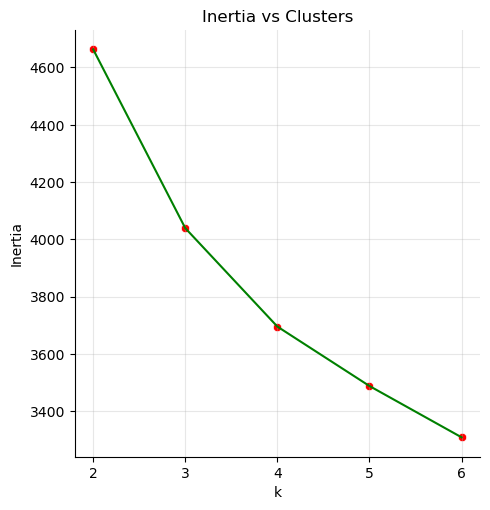

In [52]:
#Plot for inertia
Selectcluster_Plot(range(2,7),inertia)
plt.ylabel('Inertia')
plt.title('Inertia vs Clusters')
plt.show()

#The 'elbow' method does not reveal clusters to be chosen per the plot beneath.

Figure 8. Plot to aid in determing the number of 
clusters by the 'elbow' method. 

The above plot does not clearly indicate the number of clusters to choose.

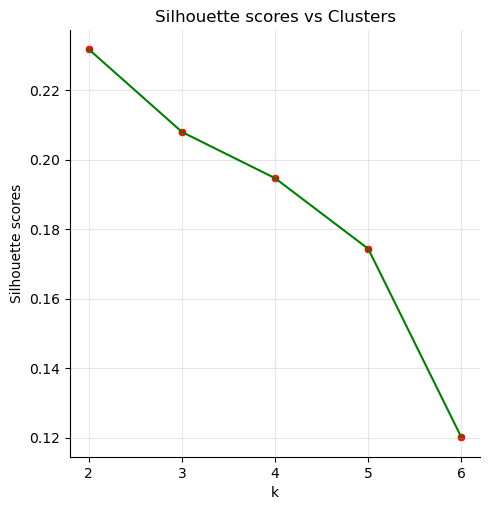

In [53]:
#Plot for silhouette scores
Selectcluster_Plot(range(2,7),silhouette)
plt.ylabel('Silhouette scores')
plt.title('Silhouette scores vs Clusters')
plt.show()

Figure 9. Plot of silhouette scores by clusters. 


Per the above plot, two clusters is chosen for KMeans clustering as it represents the cluster with the highest Silhouette score.

In [54]:
#2 clusters is chosen the number of clusters for the instance, k_means
k_means = KMeans(n_clusters=2,n_init='auto',random_state=0)

In [55]:
k_means.fit(cancer_scaled)

KMeans(n_clusters=2, random_state=0)

In [56]:
#Prediction data to be used to grahpically represent clusters and perform further analysis
y_pred =  k_means.predict(cancer_scaled)

In [57]:
#creating a column to compare each diagnosis group vs cluster group
cancer_final['prediction_kmean'] = pd.Series(y_pred,index=cancer_final.index)


#top 10 cancers cases
cancer_final.loc[:,['diagnosis','prediction_kmean']].head(10)


,diagnosis,prediction_kmean
0,1,1
1,1,0
2,1,1
3,1,1
4,1,1
5,1,1
6,1,0
7,1,1
8,1,1
9,1,1


In [58]:
#Diagnosis vs Predicted 

print(cancer_final.value_counts('diagnosis'))
print()
print(cancer_final.value_counts('prediction_kmean'))

diagnosis
0    355
1    211
dtype: int64

prediction_kmean
0    368
1    198
dtype: int64


In [59]:
#Malignant cases present to both original data and kmeans prediction
malignant_both = cancer_final[(cancer_final['diagnosis']==1) & (cancer_final['prediction_kmean']==1)].shape[0]
print(f"For diagnosis and kmeans predicted labels, there were {malignant_both} same malignant observations present to both.")

#Benign cases present to both original data and kmeans prediction
benign_both = cancer_final[(cancer_final['diagnosis']==0) & (cancer_final['prediction_kmean']==0)].shape[0]
print(f"For diagnosis and kmeans predicted labels, there were {benign_both} same benign observations present to both.")

print()

#New cases classified as malignant
malignant_new = cancer_final[(cancer_final['diagnosis']==0) & (cancer_final['prediction_kmean']==1)].shape[0]
print(f"Cases classified as malignant which were previously benign: {malignant_new}")

benign_new = cancer_final[(cancer_final['diagnosis']==1) & (cancer_final['prediction_kmean']==0)].shape[0]
print(f"Cases classified as benign which were previously malignant: {benign_new}")

diff_outcome = cancer_final[(cancer_final['diagnosis']) != (cancer_final['prediction_kmean'])].shape[0]
print(f"Therefore, {diff_outcome} observations/cases changed from their previous status")

#New clusters
print()
print(f"Cluster grouping: Cluster 0: {benign_both + benign_new}")
print(f"\t\t  Cluster 1: {malignant_both + malignant_new}")
print(f"This is confirmed by the plot below: ")

For diagnosis and kmeans predicted labels, there were 148 same malignant observations present to both.
For diagnosis and kmeans predicted labels, there were 305 same benign observations present to both.

Cases classified as malignant which were previously benign: 50
Cases classified as benign which were previously malignant: 63
Therefore, 113 observations/cases changed from their previous status

Cluster grouping: Cluster 0: 368
		  Cluster 1: 198
This is confirmed by the plot below: 


In [60]:
#creating a new column to represent M as 0 and B as 1 for plotting
cancer_final['diagnosis_2'] = cancer_final['diagnosis'].apply(lambda x: 'M' if x==1 else 'B')

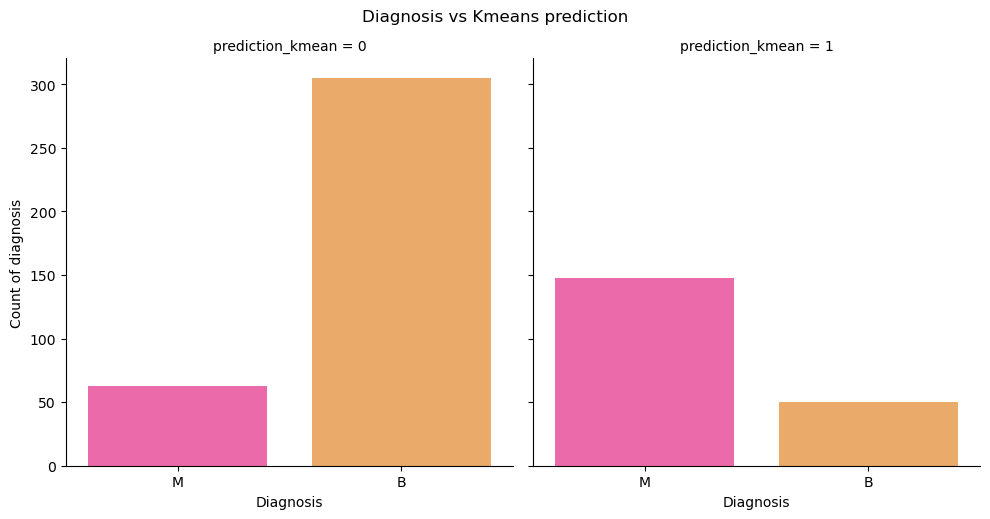

In [61]:
g = sns.catplot(data=cancer_final,kind='count',x='diagnosis_2',col='prediction_kmean',palette='spring')
g.fig.suptitle('Diagnosis vs Kmeans prediction',y=1.03)
g.set(xlabel='Diagnosis',ylabel = 'Count of diagnosis')
plt.show()


Figure 10. Count plot comparing how some predictions are grouped differently from diagnosis. Eg. Diagnosis M has a number of observations falling under prediction 0.

##### $Plot$ $of$ $K-Means$ $predictions$ $vs$ $Original$ $data$

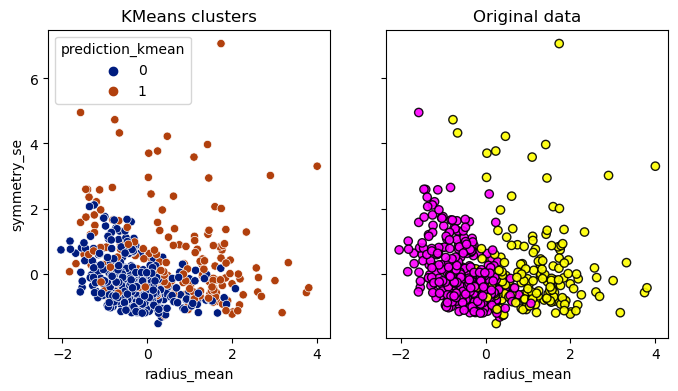

In [62]:
fig,axes = plt.subplots(1,2,sharey=True,figsize=(8,4))

g = sns.scatterplot(x=cancer_scaled[:,0],y=cancer_scaled[:,6],hue=cancer_final['prediction_kmean'],ax=axes[0],
                    palette='dark')
g.set(xlabel='radius_mean',ylabel='symmetry_se')
axes[0].set_title('KMeans clusters')


axes[1].scatter(x=cancer_scaled[:,0],y=cancer_scaled[:,6],c=y,edgecolors='black',cmap='spring',alpha=0.9)
axes[1].set_title('Original data')
axes[1].set_xlabel('radius_mean')


plt.show()

Figure 11. Scatterplot of KMeans vs original dataset for radius mean and symmetry se

Two clusters generally showed the grouping being similar to that of the plot of the benign vs malignant
The benign points are more closely to each other while malignant points are scattered around. Benign values are 
lower than malignant

##### $Hierarchical$ $clustering$

In [63]:
from sklearn.cluster import AgglomerativeClustering

In [64]:
agg_clus = AgglomerativeClustering()
y_pred_agg = agg_clus.fit_predict(cancer_scaled)

In [65]:
#creating a column to compare each diagnosis group vs cluster group
cancer_final['pred_aggClu'] = pd.Series(y_pred_agg,index=cancer_final.index)

#replacing 1 with 0 and 0 with 1 for easy interpretation
cancer_final['pred_aggClu'].replace([1,0],[0,1],inplace=True)

In [66]:
#Malignant cases present to both original data and kmeans prediction
malignant_both = cancer_final[(cancer_final['diagnosis']==1) & (cancer_final['pred_aggClu']==1)].shape[0]
print(f"For diagnosis and kmeans predicted labels, there were {malignant_both} same malignant observations present to both.")

#Benign cases present to both original data and kmeans prediction
benign_both = cancer_final[(cancer_final['diagnosis']==0) & (cancer_final['pred_aggClu']==0)].shape[0]
print(f"For diagnosis and kmeans predicted labels, there were {benign_both} same benign observations present to both.")

print()

#New cases classified as malignant
malignant_new = cancer_final[(cancer_final['diagnosis']==0) & (cancer_final['pred_aggClu']==1)].shape[0]
print(f"Cases classified as malignant which were previously benign: {malignant_new}")

benign_new = cancer_final[(cancer_final['diagnosis']==1) & (cancer_final['pred_aggClu']==0)].shape[0]
print(f"Cases classified as benign which were previously malignant: {benign_new}")

diff_outcome = cancer_final[(cancer_final['diagnosis']) != (cancer_final['pred_aggClu'])].shape[0]
print(f"Therefore, {diff_outcome} observations/cases changed from their previous status")

#New clusters
print()
print(f"Cluster grouping: Cluster 0: {benign_both + benign_new}")
print(f"\t\t  Cluster 1: {malignant_both + malignant_new}")

For diagnosis and kmeans predicted labels, there were 168 same malignant observations present to both.
For diagnosis and kmeans predicted labels, there were 295 same benign observations present to both.

Cases classified as malignant which were previously benign: 60
Cases classified as benign which were previously malignant: 43
Therefore, 103 observations/cases changed from their previous status

Cluster grouping: Cluster 0: 338
		  Cluster 1: 228


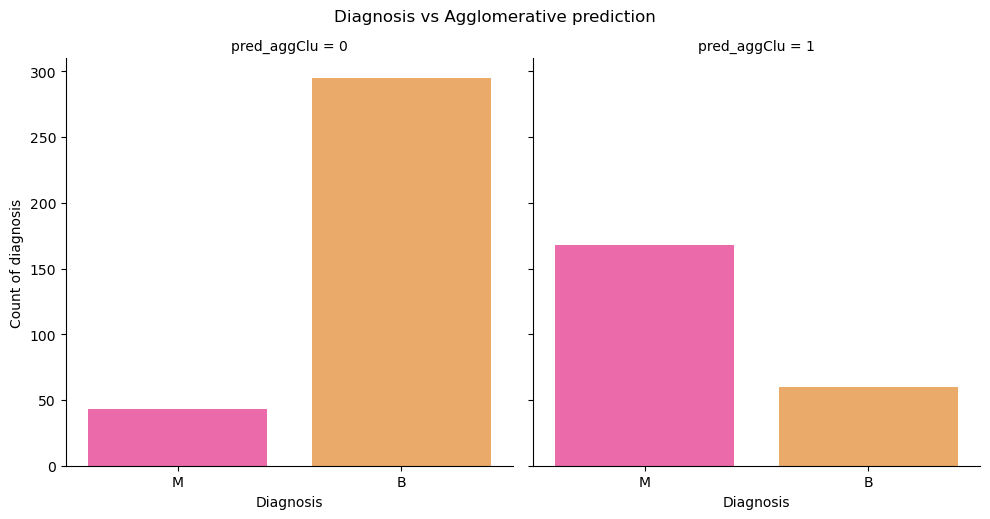

In [67]:
g = sns.catplot(data=cancer_final,kind='count',x='diagnosis_2',col='pred_aggClu',palette='spring')
g.fig.suptitle('Diagnosis vs Agglomerative prediction',y=1.03)
g.set(xlabel='Diagnosis',ylabel = 'Count of diagnosis')
plt.show()

Figure 12. Count plot comparing how some predictions are grouped differently from diagnosis. Eg. Diagnosis M has a number of observations falling under prediction 0.

In [68]:
#Agglomerative clustering produces two clusters, just as KMeans did.
cancer_final['pred_aggClu'].value_counts()


#However, agglomerative clustering grouped a lower number of observations in cluster 0 than KMeans

0    338
1    228
Name: pred_aggClu, dtype: int64

##### $Plot$ $of$ $AgglomerativeClustering$ $predictions$ $vs$ $Original$ $data$

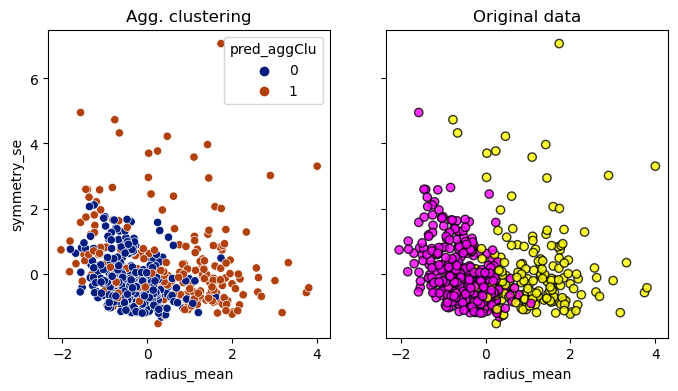

In [69]:
fig,axes = plt.subplots(1,2,sharey=True,figsize=(8,4))

g = sns.scatterplot(x=cancer_scaled[:,0],y=cancer_scaled[:,6],
                    hue=cancer_final['pred_aggClu'],ax=axes[0],palette='dark')
g.set(xlabel='radius_mean',ylabel='symmetry_se')
axes[0].set_title('Agg. clustering')


axes[1].scatter(x=cancer_scaled[:,0],y=cancer_scaled[:,6],c=y,edgecolors='black',cmap='spring',alpha=0.8)
axes[1].set_title('Original data')
axes[1].set_xlabel('radius_mean')


plt.show()


Figure 13. Agglomerative clustering vs original data

The agglomerative clustering also provided 2 clusters for analysis, with a few of the cluster 1
points being in the region of the cluster 0 cases as compared to the original data.


##### $Dendrogram$

In [70]:
from scipy.cluster.hierarchy import dendrogram,linkage

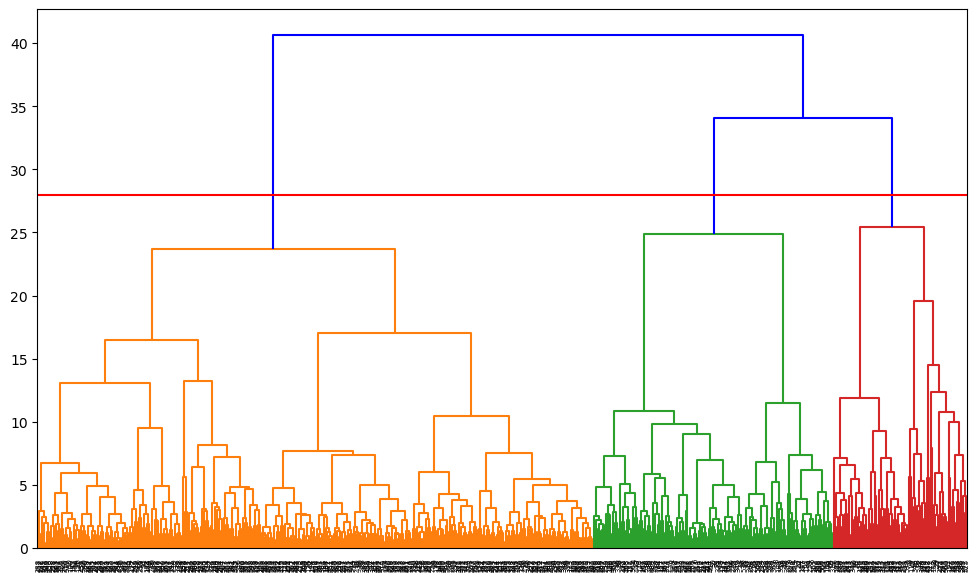

In [71]:
plt.figure(figsize=(12,7))
dend = linkage(cancer_scaled,'ward')
dendrogram(dend,above_threshold_color='blue')
plt.axhline(28, c='red')
plt.show()


Figure 14. Dendrogram depicting three clusters

The dendogram produces three clusters 
This is shown by the three vertical lines colored blue, representing only three clusters.
The 'red' horizontal line cutting through at the highest point of the dendogram indicates that the dataset could be grouped as three clusters.

##### $DBSCAN$

In [72]:
from sklearn.cluster import DBSCAN

In [73]:
dbscan = DBSCAN(eps=1)
y_pred_dbscan = dbscan.fit_predict(cancer_scaled)

In [74]:
dbscan_clusters = pd.Series(y_pred_dbscan,index=cancer_final.index)
dbscan_clusters.value_counts()

-1    456
 1    102
 0      8
dtype: int64

DBCSAN produced two clusters, with cluster 1 having 102 observations and cluster 0 having 8 observations. The rest of the datapoints (456) were classified as noise.

### $Summary$ $of$ $section$

From the above results from the cluster analysis, it is evident that the number of clusters produced by KMeans and 
Agglomerative clustering algorithms is two (2). The cluster selection for KMeans by the 'elbow method' using the inertia values for the various
number of clusters was not apparent, however, the silhouette scores produced the highest value for two clusters , hence two 
being the appriopriate number of clusters selected for further analysis. The dendrogram produced three(3) as the number of clusters, which could suggest further analysis on the dataset. 
However, DBSCAN produced two clusters with 456 datapoints classified as noises.

Further, it was observed that agglomerative clustering grouped less data points in a particluar cluster than KMeans.
338 observations were grouped under a cluster for agglomerative as against a value of 368 for a group under KMeans clustering.

In summary, the number of clusters to determine the status of the nuclei of cells was two (2), as produced by Kmeans and agglomerative clustering. However, KMeans performed better since its grouped observations were similar to the observations of the 'diagnosis' feature.

# CLASSIFICATION

Classification deals with the prediction of new datapoints/instances based on past observations. Unlike the clustering analysis discussed above, these type of machine learning algorithms learns from the mapping of input features to corresponding outputs called labels to make predictions. The label used in this study is whether an observation/cell is classified as malignant or benign. The labels could also be classified as 1, being malignant or 0 being benign, as was done in this study. 

Algorithms including logistic regression, SVC, LinearSVC, Random forest and decision trees are used in this study. The metrics for evaluating the best model are;
Accuracy: this measures the percentage of correctly classified observations out of the overall observations.

Recall score: This provides the proportion of the actual true positive cases correctly identified.

Precision score: Measures the accuracy of the positive predictions by the model.

Confusion matrix: This provides a description of the performance of a classification model.

##### $LogisticRegression$

In [75]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=10000,random_state=0)

In [76]:
log_reg.fit(X_train_scaled,y_train) #Fitting the training data 

LogisticRegression(max_iter=10000, random_state=0)

In [77]:
y_train_pred = log_reg.predict(X_train_scaled) #Predicting the training data for scores evaluation

In [78]:
from sklearn.model_selection import GridSearchCV #Grid search to be used to pick the best possible parameters for the 
                                                 #different algorithms.
    
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

from sklearn.model_selection import cross_val_score #To be used to ascertain the average of the recall scored for 
                                                    #different algorithms

In [79]:
#Functions for easy retrieval of scores and also to plot the confusion matrix

def scores(y_test,y_pred):
    print(f"Accuracy score: ",accuracy_score(y_test,y_pred))
    print(f"Precision score: ",precision_score(y_test,y_pred,average='weighted'))
    print(f"Recall score: ",recall_score(y_test,y_pred,average='weighted'))
    print(f"Confusion matrix:")
    confusion_plot(confusion_matrix(y_test,y_pred))

#This function will calculate the average recall scores obtained after applying cross validation    
def crossVal_scores(scores):
    print(f"Scores",list(scores))
    print(f"Mean recall score",scores.mean())
    print(f"Standard deviation",scores.std())
    
def confusion_plot(confusion_score):
    plt.figure(figsize=(1,1))
    sns.heatmap(confusion_score,annot=True,square=True,fmt='d',
                cmap='tab10',cbar=False)
    plt.show()

Accuracy score:  0.9734513274336283
Precision score:  0.9734344596089853
Recall score:  0.9734513274336283
Confusion matrix:


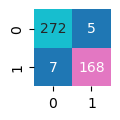

In [80]:
scores(y_train,y_train_pred) #Using the function created to check for scores and produce confusion matrix

In [81]:
#Recall scores will be the metric to prioritize in order to detect malignant cases


#Applying cross validation on the logistic regression model; log_reg

cross_val = cross_val_score(log_reg,X_train_scaled,y_train,scoring='recall_weighted',cv=10)
logistic_regression_scores = cross_val
crossVal_scores(cross_val)

Scores [0.9782608695652174, 0.9782608695652174, 0.9777777777777777, 0.9777777777777777, 0.9555555555555556, 0.9111111111111111, 0.9333333333333333, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777]
Mean recall score 0.9645410628019324
Standard deviation 0.022719904860597585


In [82]:
#Gridsearch to find best parameters for Logistic regression 
parameters = {'penalty':['l2'],'max_iter':[1000,5000,10000]}
logistic_reg = LogisticRegression()
gridSearch = GridSearchCV(logistic_reg,param_grid=parameters,return_train_score=True,cv=10,
                                 scoring='recall_weighted')

search_log = gridSearch.fit(X_train_scaled,y_train)
search_log.best_estimator_  #The best estimator produced after providing parameters

LogisticRegression(max_iter=1000)

Accuracy score:  0.9734513274336283
Precision score:  0.9734344596089853
Recall score:  0.9734513274336283
Confusion matrix:


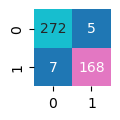

In [83]:
#Predicting using the best estimator obtained above
y_train_pred = search_log.predict(X_train_scaled)
scores(y_train,y_train_pred)


##### $LinearSVC$

In [84]:
from sklearn.svm import LinearSVC
lin_svc = LinearSVC(dual='auto',random_state=0)

In [85]:
lin_svc.fit(X_train_scaled,y_train)

LinearSVC(dual='auto', random_state=0)

In [86]:
y_train_pred = lin_svc.predict(X_train_scaled)

Accuracy score:  0.9712389380530974
Precision score:  0.971218356410386
Recall score:  0.9712389380530974
Confusion matrix:


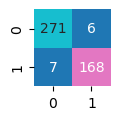

In [87]:
scores(y_train,y_train_pred)

In [88]:
#applying cross validation
cross_val = cross_val_score(lin_svc,X_train_scaled,y_train,scoring='recall_weighted',cv=10)
linear_svc_scores = cross_val
crossVal_scores(cross_val)

Scores [0.9782608695652174, 0.9782608695652174, 0.9777777777777777, 0.9555555555555556, 0.9555555555555556, 0.9333333333333333, 0.9555555555555556, 0.9555555555555556, 0.9777777777777777, 0.9777777777777777]
Mean recall score 0.9645410628019324
Standard deviation 0.014828950757835474


In [89]:
#Gridsearch to find best parameters for LinearSVC 
parameters = {'penalty':['l2'],'max_iter':[1000,5000,10000]}
linear_svc = LinearSVC(dual='auto')
gridSearch = GridSearchCV(linear_svc,param_grid=parameters,return_train_score=True,cv=10,
                                 scoring='recall_weighted')

In [90]:
search_lin_svc = gridSearch.fit(X_train_scaled,y_train)

In [91]:
search_lin_svc.best_estimator_ 
#The best estimator after providing parameters is the same as the initial LinearSVC, lin_svc

LinearSVC(dual='auto')

Accuracy score:  0.9712389380530974
Precision score:  0.971218356410386
Recall score:  0.9712389380530974
Confusion matrix:


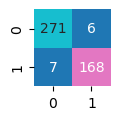

In [92]:
y_grid_pred = search_lin_svc.predict(X_train_scaled)
scores(y_train,y_grid_pred) #Same score is obtained as the lin_svc

##### $SVC$

In [93]:
from sklearn.svm import SVC
svc = SVC(random_state=0)
svc.fit(X_train_scaled,y_train)

SVC(random_state=0)

In [94]:
y_train_pred = svc.predict(X_train_scaled)

Accuracy score:  0.9712389380530974
Precision score:  0.9713316978081008
Recall score:  0.9712389380530974
Confusion matrix:


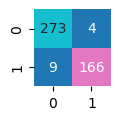

In [95]:
scores(y_train,y_train_pred)

In [96]:
#cross validation
cross_val = cross_val_score(svc,X_train_scaled,y_train,scoring='recall_weighted',cv=10)
svc_scores = cross_val
crossVal_scores(cross_val)

Scores [0.9347826086956522, 0.9565217391304348, 0.9555555555555556, 0.9333333333333333, 0.9555555555555556, 0.9111111111111111, 0.9111111111111111, 1.0, 1.0, 0.9333333333333333]
Mean recall score 0.9491304347826087
Standard deviation 0.029847137134680263


In [97]:
#Gridsearch to find best parameters for SVC 
parameters = {'kernel':['poly','linear'],'degree':[2,3],'C':[1,5,10],'coef0':[1,3,5]}
svc = SVC()
gridSearch = GridSearchCV(svc,param_grid=parameters,return_train_score=True,cv=5,
                                 scoring='recall_weighted')

In [98]:
search_svc = gridSearch.fit(X_train_scaled,y_train)

In [99]:
search_svc.best_estimator_ #Best estimator with a degree of 2 and kernel of type 'poly'

SVC(C=1, coef0=5, degree=2, kernel='poly')

Accuracy score:  0.9734513274336283
Precision score:  0.9734513274336283
Recall score:  0.9734513274336283
Confusion matrix:


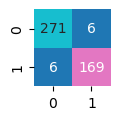

In [100]:
y_grid_pred = search_svc.predict(X_train_scaled)
scores(y_train,y_grid_pred)

SVC's best estimator provides a good score than the initial SVC with no parameters used.
The average recall score is 94.9%, however, the best SVC model provides a recall score of 97.3% which performs slightly better than the model with no paramters, 97.12%.

##### $DecisionTreeClassifier$

In [101]:
from sklearn.tree import DecisionTreeClassifier
treeC = DecisionTreeClassifier(random_state=0)

In [102]:
treeC.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

Accuracy score:  1.0
Precision score:  1.0
Recall score:  1.0
Confusion matrix:


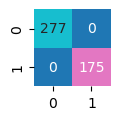

In [103]:
y_train_pred = treeC.predict(X_train)
scores(y_train,y_train_pred) 

In [104]:
#cross validation
cross_val = cross_val_score(treeC,X_train,y_train,scoring='recall_weighted',cv=10)
decision_tree_scores = cross_val
crossVal_scores(cross_val)

Scores [0.9347826086956522, 0.9347826086956522, 0.9111111111111111, 0.9333333333333333, 0.9333333333333333, 0.8888888888888888, 0.9555555555555556, 0.8888888888888888, 0.9333333333333333, 0.9111111111111111]
Mean recall score 0.9225120772946861
Standard deviation 0.02065261179861798


In [105]:
#Gridsearch to find best parameters for Decision Tree
parameters = {'max_features':[5,8,10],'max_depth':[2,10,None]}
dec_tree = DecisionTreeClassifier()
gridSearch = GridSearchCV(dec_tree,param_grid=parameters,return_train_score=True,cv=10,
                                 scoring='recall_weighted')

In [106]:
search_dec_tree = gridSearch.fit(X_train,y_train) #Scaled data is not used.

In [107]:
search_dec_tree.best_estimator_ 

DecisionTreeClassifier(max_depth=10, max_features=10)

Accuracy score:  1.0
Precision score:  1.0
Recall score:  1.0
Confusion matrix:


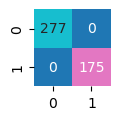

In [108]:
#best estimator predictions
y_train_pred = search_dec_tree.predict(X_train)
scores(y_train,y_train_pred) 

The best estimator of decision tree classifier provides the same scores as the initial
instance used. However, the scores provided indicates that this model is overfitting the training dataset and 
could then provide wrong classifications.
The cross validation scores provided by this model provides further proof that this model is overfitting since
the highest recall score provided by cross validation does not exceed 95.6%. The mean recall score of this model is 92%, performing the worst among all other models.

##### $RandomForestClassifier$

In [109]:
from sklearn.ensemble import RandomForestClassifier
randomForest = RandomForestClassifier(random_state=0) #no parameter passed
randomForest.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

Accuracy score:  1.0
Precision score:  1.0
Recall score:  1.0
Confusion matrix:


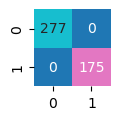

In [110]:
#predicting and checking metrics for classification for the instance: randomForest
y_train_pred = randomForest.predict(X_train)
scores(y_train,y_train_pred)

In [111]:
#cross validation
cross_val = cross_val_score(randomForest,X_train,y_train,scoring='recall_weighted',cv=10)
random_forest_scores = cross_val
crossVal_scores(cross_val)

Scores [0.9130434782608695, 0.9565217391304348, 0.9555555555555556, 0.9111111111111111, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9111111111111111, 1.0, 0.9555555555555556]
Mean recall score 0.9469565217391305
Standard deviation 0.026447499554353774


In [112]:
#Gridsearch to find best parameters for Random Forest 
parameters = {'n_estimators':[10,50,100,200],'max_features':[5,8,10],'max_depth':[2,10,None]}
random_forest = RandomForestClassifier()
gridSearch = GridSearchCV(random_forest,param_grid=parameters,return_train_score=True,cv=10,
                                 scoring='recall_weighted')

In [113]:
#fitting to find best parameters for Random forest
gridSearch.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 10, None], 'max_features': [5, 8, 10],
                         'n_estimators': [10, 50, 100, 200]},
             return_train_score=True, scoring='recall_weighted')

In [114]:
#Optimal parameters based on parameters provided to GridSearch
gridSearch.best_estimator_

RandomForestClassifier(max_depth=10, max_features=5, n_estimators=50)

Accuracy score:  1.0
Precision score:  1.0
Recall score:  1.0
Confusion matrix:


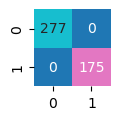

In [115]:
bestRandomForest = gridSearch.best_estimator_ #creating an instance of our best random forest estimator
y_train_pred=bestRandomForest.predict(X_train) #predicting using the best random forest model
scores(y_train,y_train_pred) #scores for our model

#RandomForest Classifier exhibits same tendencies as decision tree classifier, with both models overfitting the 
#training dataset. The mean recall score from applying cross validation is 94.6%.

##### $Plotting$ $mean$ $recall$ $scores$

In [116]:
scores_for_plot = {"logistic regression":logistic_regression_scores,
                    "linear svc": linear_svc_scores,
                    "svc":svc_scores,
                    "decision trees":decision_tree_scores,
                    "random forest":random_forest_scores}

to_plot = pd.DataFrame(scores_for_plot)

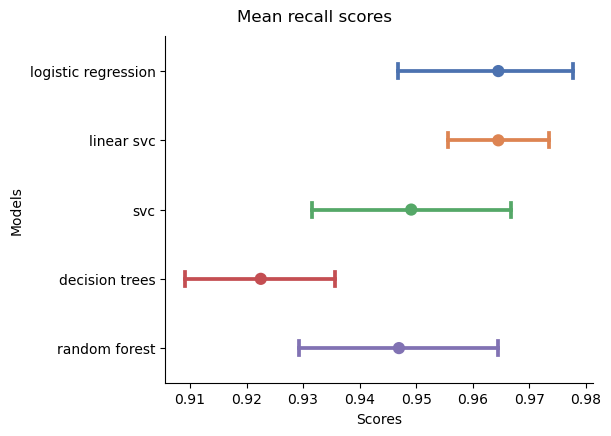

In [117]:
g = sns.catplot(data=to_plot,kind='point',estimator='mean',join=False,capsize=0.2,orient='h',
           height=4,palette='deep',aspect=1.5)
g.fig.suptitle('Mean recall scores',y=1.03)
g.set(xlabel='Scores',ylabel = 'Models')
plt.show()

Although accuracy and precision are critical in classification algorithms, the primary evaluation score prioritised in this analysis is 
the recall score. This is because a model that has the highest probability of detecting malignant cells is of significance (Chen $et$ $al$,2023). 
After identifying the best hyperparameters for each of the five(5) models, LinearSVC and 
logistic regression performed best with regards to recall score. 
The best estimator of LinearSVC produced a recall score of 97.12%, with its mean recall score being 96.45%.
The best estimator of Logistic regression produced a recall of 97.34% and produced a mean recall score of 96.45%
The recall scores for RandomForest and DecisionTree from their best estimators proved that both algorithms overfitted 
the train set with each producing a perfect recall score of 1.
RandomForest produced a cross validation mean recall score of 94.69% with DecisionTree performing the worst with
a cross validation mean recall score of 92%.

From the above plot, the two models that perform best are linearsvc and logistic regression. However, the best estimators of the two models revealed that logistic regression produces a recall score of 97.34% with both accuracy and precision scores of 97.34%, while linearSVC produced a recall score of 97.12% with an accuracy and precision score of 97.12%.

Hence, the model chosen to further testing the data is the logistic regression.


### $Final$ $Model$ $:$ $Best$ $estimator$ $of$ $Logistic$ $regression$

In [118]:
final_model = search_log.best_estimator_

In [119]:
final_pred = final_model.predict(X_test_scaled)

Accuracy score:  1.0
Precision score:  1.0
Recall score:  1.0
Confusion matrix:


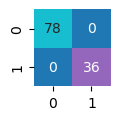

In [120]:
scores(y_test,final_pred)

The final model performs better with a recall score of 100% as compared to its previous score of 97.34%. The accuracy and precision scores also perform better. 

# CONCLUSION, RECOMMENDATION AND LIMITATIONS

This study was conducted with the purpose to gain insights on the nuclei of cells and further classify these cells as malignant or benign cancer cells. The dataset consisted of thirty-two attributes, out of which thirty were the characteristics of the cells. Due to the multicollinearity of some variables, assessed by Spearman's correlation, only ten (10) features were used in this study. An initial exploratory data analysis indicated that there were 355 benign cells and 211 malignant cancer cells, after handling missing values. Also, most features were on different scales, hence data were standardized to prevent the impact of different dimensions on the models. 

In understanding the patterns or insights about the cells, an unsupervised machine learning  was conducted. Cluster analysis algorithms were used to cluster the cells, namely; KMeans, Agglomerative, DBSCAN and the visual representation with the Dendrogram. It was concluded from the Silhouette score metric that the number of clusters derived from the analysis were two for the KMeans, although the dendrogram suggested three (3) clusters. Two clusters were then likened to the diagnosis of the cancer cells, as either malignant or benign. Ultimately, KMeans was chosen as the best model for the analysis. 

Further, in classifying the cells as either malignant or benign, five (5) classification algorithms were adopted, namely; Logistic regression, LinearSVC, SVC, Decision tree classifier and Random forest classifier. The models were primarily evaluated by their average recall scores after applying a ten (10) layer cross vaidation set. Logistic regression produced the highest average recall scores (97.34%) while decision trees produced the worst average recall scores (92%) after applying the cross validation set. Consequently, Logistic regression was the chosen model for testing on the final dataset, scoring 100% with regards to recall, accuracy and precision.

The study assisted in making headway to identify or group the nuclei of cells into either malignant or benign using only characteristics of the cells, however, a limitation of this study was the fact that the study was conducted on only numerical dataset. Gender, illness history and other important features could aid in providing better results for the early detection of cancer cells.  
Also, the dataset included many missing/invalid datapoints with no explanation of their omission. Gaining a better understanding of the dataset ensures that biases are eliminated, ensuring a high accuracy rate for models. 


## ETHICAL IMPLICATIONS

Working with clinical data poses a number of risks due to the sensitivity nature of the information involved.
The privacy and confidentiality of patient information not being paramount, and unauthorized access to patient information is very critical to such research works. Health professionals/researchers must seek the consent from patients on how their data will be used. Patients must also be provided the opportunity to either accept or decline the request and not feel coerced.

Researchers using inaccurate and unreliable data to make medical decisions imposes a great risk on the health sector. Data lacking integrity could cause incorrect diagnosis or inappropriate treatments. Also data collected must be devoid of bias and should be fair in order to avoid skewness in results. This includes the underrepresentation of certain demographics and population.

Lastly, another ethical implication that could arise is the non-transparency of methods and findings when working with clinical data. The avoidance of conflict of interest could be a critical issue when working in such spaces. 

## REFERENCES

Chen C, Wang N, Du X, Mei K, Zhou Y, Cai G (2023) ‘Classification Prediction of Breast Cancer Based on Machine Learning’, $Hindawi$ $Computational$ $Intelligence$ $and$ $Neuroscience$, Volume 2023 ,Available at: https://doi.org/10.1155/2023/6530719 (Accessed: 31st January 2024).

Doi K, MacMahon H, Katsuragawa S, Nishikawa RM, Jiang Y. (1999) ‘Computer-aided diagnosis in radiology: potential and pitfalls’, $European$ $Journal$ $of$ $Radiology$, 31(2), pp.97-109. Available at: 10.1016/s0720-048x(99)00016-9. (Accessed: 6 February 2024).

WHO (2023) $Breast$ $cancer$. Available at:
https://www.who.int/news-room/fact-sheets/detail/breast-cancer#:~:text=If%20left%20unchecked%2C%20the%20tumours,nearby%20breast%20tissue%20(invasion). (Accessed: 6 February 2024).
